# Predicting Income

In this project, we will be using an ensemble machine learning technique - **Random Forest**. We are going to compare its performance with **Dicision Tree** algorithm, on a dataset containing [census information from UCI’s Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult/). By using census data with a Random Forest and Dicision Tree, we will try to predict whether a person makes more than $50,000.

Random Forest is a technique that allows to prevent overfitting on training data which single Decision Tree algorithms are often prone to. The idea is simple: Random Forest contains many Decision Trees that all work together to classify new points - it’s like every tree gets a vote, and classification that got the maximum number of votes, wins.

Attribute Information:

1. age: continuous;
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. income: >50K, <=50K.

## Data Investigation

Let’s begin with imports and investigating the data available to us. 

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Basic imports related to analysis
import pandas as pd

# Imports for visualisationin
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for ml
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
income_data = pd.read_csv('income.csv', delimiter = ', ')
income_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
income_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
income_data[income_data['income'] == '>50K'].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [6]:
income_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

## Feature Modelling

Now we can begin putting it in a format that our Random Forest can work with. To do this, we need to separate the labels from the rest of the data.

In [7]:
income_data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [8]:
income_data['income-num'] = income_data.income.map({'>50K': 1, '<=50K': 0})
income_data.head(2)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income-num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0


In [9]:
labels = income_data[['income-num']]
labels.head()

,income-num
0,0
1,0
2,0
3,0
4,0


In [10]:
income_data.corr()[6:7]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income-num
income-num,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.0


There are several columns in `object` format that might be useful to use in prediction, let's map them according to their values.

In [11]:
income_data['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

For isnstance, since the majority of the data comes from `United-States`, it might make sense to make a column where every row that contains `United-States` becomes a `0` and any other country becomes a `1`. 

In [12]:
income_data['native-country-num'] = income_data['native-country'].apply(lambda row: 1 if row == 'United-States' else 0)
income_data.head(2)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income-num,native-country-num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1


Similar is the situation with `sex` column. We can replace `Female` with `1` and `Male` with `0`

In [13]:
income_data.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [14]:
income_data['sex-num'] = income_data.sex.map({'Female': 1, 'Male': 0})
income_data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income-num,native-country-num,sex-num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1,0


In [15]:
income_data.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [16]:
income_data = pd.get_dummies(data=income_data, columns=['race'])
income_data.head(2)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,...,native-country,income,income-num,native-country-num,sex-num,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,...,United-States,<=50K,0,1,0,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,...,United-States,<=50K,0,1,0,0,0,0,0,1


In [17]:
income_data.corr()[6:7]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income-num,native-country-num,sex-num,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
income-num,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.0,0.03447,-0.21598,-0.028721,0.010543,-0.089089,-0.03183,0.085224


Correlations of new variations of `race` features and `native-country-num` with `income` are very low, so there is not much sense to include them in the training set. However, we can test that. 

## Random Forest Creation

In [18]:
# Select features 
data_0 = income_data[[
    'age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex-num', 'native-country-num',
    'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White'
    ]]
# Split data and labels for training and testing sets
train_data_0, test_data_0, train_labels_0, test_labels_0 = train_test_split(data_0, labels, random_state=1)
# Instantiate classifier
forest_0 = RandomForestClassifier(random_state=1)
# Train classifier
forest_0.fit(train_data_0, train_labels_0)
# Get accuracy of the classifier
print(round(forest_0.score(test_data_0, test_labels_0), 4)*100, '%')

82.07 %


Let's visualise which features are important for the 1st model.

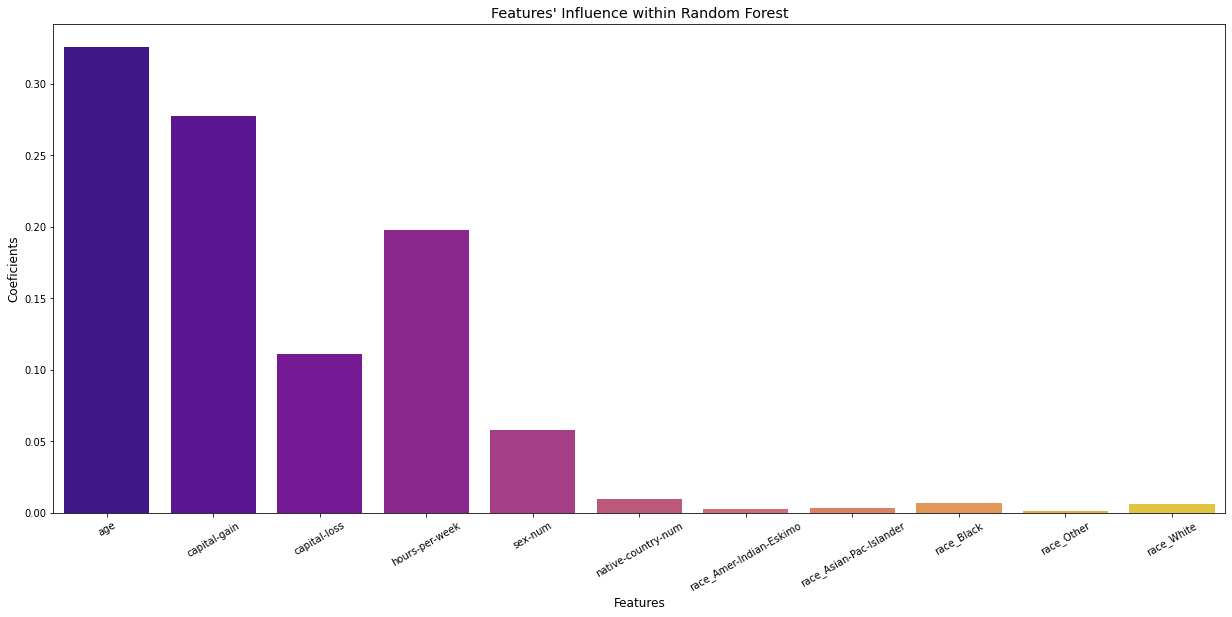

In [19]:
def visualise_barchart(feature_lst, values):
    # Prepare grid
    plt.figure(figsize = (21,9))
    
    # Draw barplot
    ax = sns.barplot(x = feature_lst, y = values, palette='plasma')

    # Add descriptions
    plt.title('Features\' Influence within Random Forest', fontsize='x-large')
    plt.xlabel('Features', fontsize='large')
    plt.ylabel('Coeficients', fontsize='large')
    ax.set_xticklabels(feature_lst, rotation=30)

    return plt.show()

visualise_barchart(
    forest_0.feature_names_in_, 
    forest_0.feature_importances_)

In [20]:
# Select features 
data = income_data[[
    'age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex-num' ]]
# Split data and labels for training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)
# Instantiate classifier
forest = RandomForestClassifier(random_state=1)
# Train classifier
forest.fit(train_data, train_labels)
# Get accuracy of the classifier
print(round(forest.score(test_data, test_labels), 4)*100, '%')

82.73 %


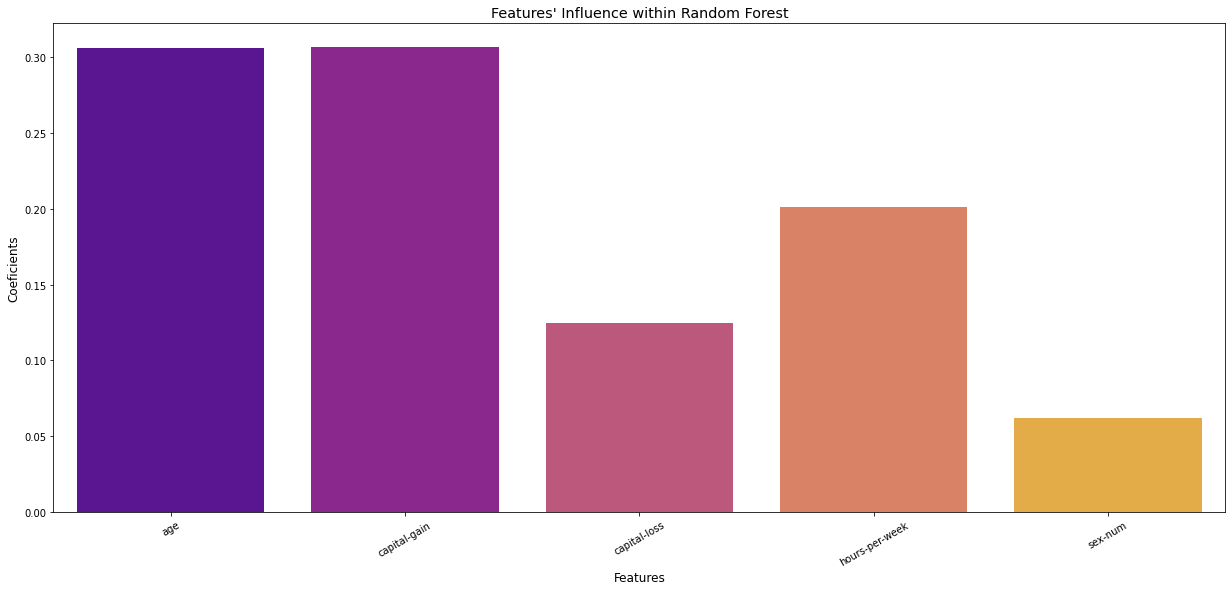

In [21]:
visualise_barchart(
    forest.feature_names_in_, 
    forest.feature_importances_)

Result: the accuracy with `race` variations and `native-country-num` features is a bit lower than without them, so we'll take only the most significant from model's perspective features (`age`, `capital-gain`, `capital-loss`, `hours-per-week`, `sex-num`) to the next step.

## Decision Tree Classifier Creation

Let's create another classifier, but using Decision Tree alorithm. 

In [22]:
def best_tree(train_data, train_labels, test_data, test_labels): 
    # Find best parameters for classifier
    best_depth= 0
    best_score = 0
    best_leaf_nodes = 0
    best_classifier = None
    for current_depth in range(1,21):
        for current_leaf_nodes in range(6,101):
            # Instantiate classifier
            current_classifier = DecisionTreeClassifier(random_state = 2, max_depth = current_depth, max_leaf_nodes = current_leaf_nodes)
            # Train classifier
            current_classifier.fit(train_data, train_labels) 
            # Get accuracy of the classifier
            current_score = current_classifier.score(test_data, test_labels)
            if best_score < current_score:      
                best_score = current_score
                best_depth = current_depth 
                best_classifier = current_classifier
                best_leaf_nodes = current_leaf_nodes
    return best_classifier, best_score

In [23]:
tree_classifier, score = best_tree(train_data, train_labels, test_data, test_labels)
print(round(score, 4) * 100, '%')

83.59 %


Accuracy score is a bit higher than `forest` has, but that's completely understandable, considering it's only one tree and its result is "subjective". Let's see what features it considers important within current data split.

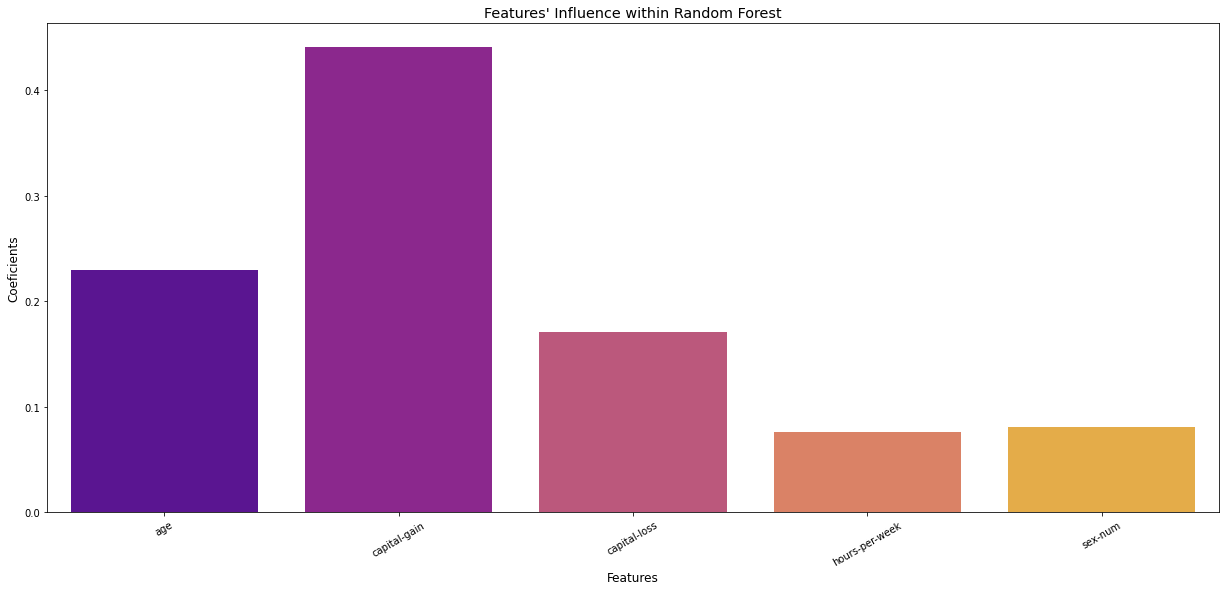

In [24]:
visualise_barchart(
    tree_classifier.feature_names_in_, 
    tree_classifier.feature_importances_)

Result: `capital-gain` got even higher priority reaching higher than `0.4`. `forest` also gave this feature high priority, but it was about `0.3` and was almost equal to the priority of `age`.

In [25]:
income_data[:2]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,...,native-country,income,income-num,native-country-num,sex-num,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,...,United-States,<=50K,0,1,0,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,...,United-States,<=50K,0,1,0,0,0,0,0,1


## Simulation of Extrinsic Testing

Now let's create a small dataset with values close to those that exist within census and try to see what `forest` and `tree` classifiers will be able to predict. 

In [42]:
data = [
    [28, 4650, 540, 40, 0],
    [42, 2961, 0, 40, 1],
    [34, 0, 0, 40, 1],
    [29, 2300, 739, 30, 0],
    [19, 1174, 50, 20, 1],
    [53, 10566, 760, 32, 0],
    [26, 9800, 1340, 40, 1],
    [46, 6418, 0, 40, 0],
    [38, 7443, 480, 40, 1],
    [24, 830, 80, 40, 0],
]

columns=['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex-num']

census = pd.DataFrame(data, columns=columns)
census

,age,capital-gain,capital-loss,hours-per-week,sex-num
0,28,4650,540,40,0
1,42,2961,0,40,1
2,34,0,0,40,1
3,29,2300,739,30,0
4,19,1174,50,20,1
5,53,10566,760,32,0
6,26,9800,1340,40,1
7,46,6418,0,40,0
8,38,7443,480,40,1
9,24,830,80,40,0


In [43]:
census['income_predby_forest'] = forest.predict(census[forest.feature_names_in_])
census['income_predby_tree'] = tree_classifier.predict(census[tree_classifier.feature_names_in_])


census = census[['income_predby_forest', 'income_predby_tree', 'age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex-num']]
census

,income_predby_forest,income_predby_tree,age,capital-gain,capital-loss,hours-per-week,sex-num
0,0,0,28,4650,540,40,0
1,0,0,42,2961,0,40,1
2,0,0,34,0,0,40,1
3,0,0,29,2300,739,30,0
4,0,0,19,1174,50,20,1
5,1,1,53,10566,760,32,0
6,1,1,26,9800,1340,40,1
7,1,0,46,6418,0,40,0
8,0,1,38,7443,480,40,1
9,0,0,24,830,80,40,0


## Conclusion

We have created 2 classifiers:
- Random Forest;
- Decision Tree.

Both of them use similar approach at their core: they both have decision tree(s) that split data based on features that provide most information game at the moment. The difference is in numbers of "trees", random forest has many of them, so that should soothe biases and overfitting compared to results of one "tree" within Decision Tree classifier. 

Intrinsic testing has shown that accuracy scores of both classifiers were pretty high and very similar `82-83%`. And coefficients of importance of given feature set was quite similar. Though Decision Tree decided that `capital-gain` is the most important feature for determining result, whereas Forest though that `age` has the same level of importance.

Small simulation of extrinsic testing shown that classifiers determine without problems that person's income is more than 50 when their `capital-gain` is high. But when person has medium size income some things that are harder to explain start occurring. For instance, a person with `capital-gain = 6418` and `capital-loss = 0` is predicted to earn more than 50 by Forest, but not by Tree. At the same time person with `capital-gain = 7443` and `capital-loss = 480` is vice versa predicted to earn more than 50 only by Tree. Though if we just subtract 480 from 7443 we'll get greater amount than 6418. To tell how exactly each model come to its conclusions further testing  and application of different model explanatory techniques are requited, but it is already clear that not only `capital-gain` and `capital-loss` are at play. 